In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

# Generating the training data

(200, 2)
(200,)


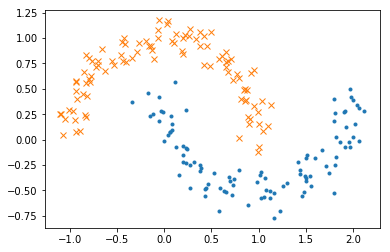

In [3]:
n = 200
# (x, y) = datasets.make_circles(n_samples=n, noise=0.1)
(x, y) = datasets.make_moons(n_samples=n, noise=0.1)
I = (y > 0)
J = np.logical_not(I)
print x.shape
print y.shape
plt.plot(x[I,0], x[I, 1], '.', x[J,0], x[J, 1], 'x');

# Building the Radical Basis Function Network

In [31]:
class NN(object):
    pass

r = NN()

# Number of radical basis to use
N = 150

r.x = tf.placeholder(tf.float32, (None, 2))
r.ref = tf.placeholder(tf.float32, (None, 1))
r.c = tf.Variable(tf.random_normal(shape=(N, 2)), dtype=tf.float32)
r.v = tf.Variable(tf.ones(shape=(N,1)))
r.W = tf.Variable(tf.random_normal(shape=(N, 1)))
r.b = tf.Variable(0, dtype=tf.float32)

e = tf.reshape(r.x, (-1, 1, 2)) - tf.reshape(r.c, (1, N, 2))
d = tf.norm(e, axis=2)
rho = tf.exp(-d * d / 2 / tf.transpose(r.v))
r.y = tf.matmul(rho, r.W) + r.b

## Define the error function

In [32]:
r.err = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(labels=r.ref, logits=r.y))

# Training

In [33]:
batch_size = 100
epochs = 400
rate = 0.002

def batch():
    index = np.random.choice(n, batch_size)
    x_train = x[index]
    y_train = y[index].reshape(batch_size, 1)
    return {r.x: x_train, r.ref: y_train}

optimizer = tf.train.GradientDescentOptimizer(rate).minimize(r.err)

s = tf.Session()
s.run(tf.global_variables_initializer())
s.run(r.err, batch())

309.70578

In [34]:
for ep in range(epochs):
    err, _ = s.run((r.err, optimizer), feed_dict=batch())
    if ep % (epochs // 10) == 0:
        print "[%d] %.3f" % (ep, err)
print "Done: %.3f" % err

[0] 288.194
[40] 22.258
[80] 19.440
[120] 7.928
[160] 4.433
[200] 4.230
[240] 5.239
[280] 1.845
[320] 1.780
[360] 1.550
Done: 1.754


# Plot the decision boundary

In [35]:
x0 = np.linspace(np.min(x[:,0]), np.max(x[:, 0]), 100)
x1 = np.linspace(np.min(x[:,1]), np.max(x[:, 1]), 100)
xx, yy = np.meshgrid(x0, x1)
xy = np.asarray([xx.reshape(-1), yy.reshape(-1)]).T
z = s.run(r.y, feed_dict={r.x: xy})
z = z.reshape(100, 100)

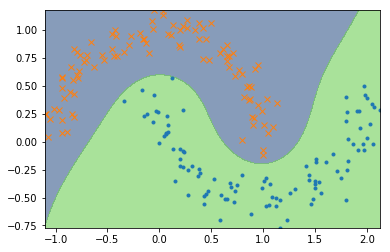

In [36]:
plt.contourf(xx, yy, z, levels=[np.min(z), 0.5, np.max(z)], alpha=0.6);
plt.plot(x[I,0], x[I, 1], '.', x[J,0], x[J, 1], 'x');